In [1]:
import json
import xml.etree.ElementTree as ET
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
athletes_df = pd.read_json('data/olympic_athletes.json')
hosts_df = pd.read_xml('data/olympic_hosts.xml')
medals_df = pd.read_excel('data/olympic_medals.xlsx')
results_df = pd.read_html('data/olympic_results.html')[0]

In [3]:
athletes_medals_df = athletes_df.merge(medals_df, on='athlete_url', how='left')
athletes_results_df = athletes_medals_df.merge(results_df, left_on='athlete_url', right_on='athlete_url', how='left')
combined_df = athletes_results_df.merge(hosts_df, left_on='slug_game_x', right_on='game_slug', how='left')

In [4]:
combined_df.columns

Index(['athlete_url', 'athlete_full_name_x', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio',
       'Unnamed: 0_x', 'discipline_title_x', 'slug_game_x', 'event_title_x',
       'event_gender', 'medal_type_x', 'participant_type_x',
       'participant_title', 'athlete_full_name_y', 'country_name_x',
       'country_code_x', 'country_3_letter_code_x', 'Unnamed: 0_y',
       'discipline_title_y', 'event_title_y', 'slug_game_y',
       'participant_type_y', 'medal_type_y', 'athletes', 'rank_equal',
       'rank_position', 'country_name_y', 'country_code_y',
       'country_3_letter_code_y', 'athlete_full_name', 'value_unit',
       'value_type', 'index', 'game_slug', 'game_end_date', 'game_start_date',
       'game_location', 'game_name', 'game_season', 'game_year'],
      dtype='object')

In [5]:
medals_per_athlete = combined_df.groupby('athlete_full_name')['medal_type_x'].count()
medals_per_athlete = medals_per_athlete.sort_values(ascending=False)
athlete_games_details = combined_df[['athlete_full_name', 'game_name', 'game_year', 'medal_type_x']]

In [6]:
medals_per_athlete.head(25)

athlete_full_name
Michael PHELPS               288
Takashi ONO                  230
Larisa LATYNINA              210
Marit BJOERGEN               192
Ole Einar BJÃRNDALEN        180
Nikolay ANDRIANOV            180
Heikki SAVOLAINEN            170
Boris SHAKHLIN               170
Kjetil Andre AAMODT          168
Claudia PECHSTEIN            152
Ireen WÃST                  150
Alexei NEMOV                 140
Sawao KATO                   135
Viktor Ivanovich CHUKARIN    126
Stefania BELMONDO            119
Bode MILLER                  114
Kirsty Leigh COVENTRY        112
Georges MIEZ                 110
BjÃ¶rn DAEHLIE               108
Leon STUKELJ                 105
Eizo KENMOTSU                102
Vitaly SCHERBO                99
Arianna FONTANA               98
Vera CASLAVSKA                96
Katerina NEUMANNOVA           96
Name: medal_type_x, dtype: int64

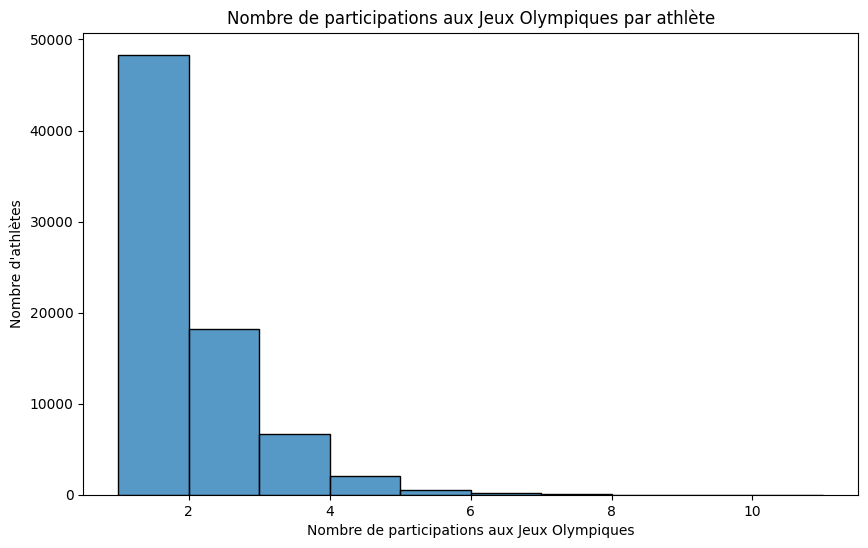

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(athletes_df['games_participations'], bins=range(1, athletes_df['games_participations'].max() + 2), kde=False)
plt.xlabel('Nombre de participations aux Jeux Olympiques')
plt.ylabel('Nombre d\'athlètes')
plt.title('Nombre de participations aux Jeux Olympiques par athlète')
plt.show()

C:\Users\kirit\AppData\Local\Temp\ipykernel_26176\3936975198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_count.index, y=medals_count.values, palette='viridis')


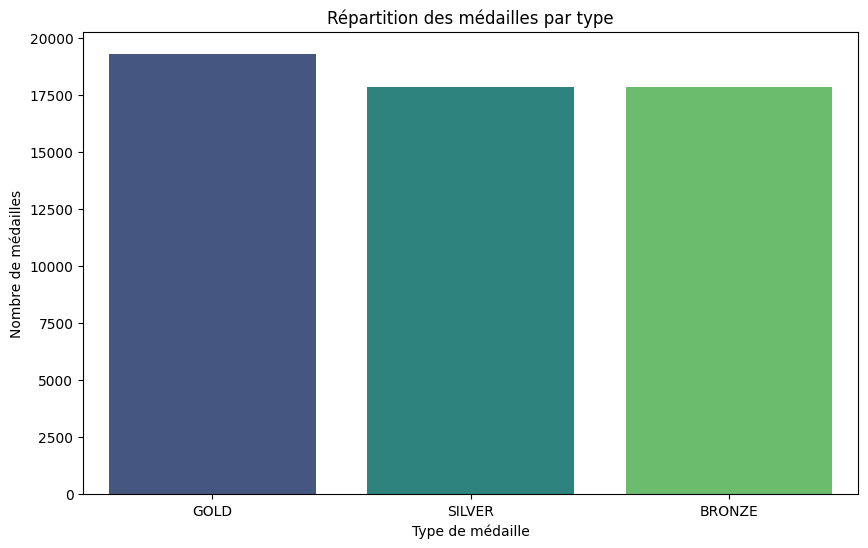

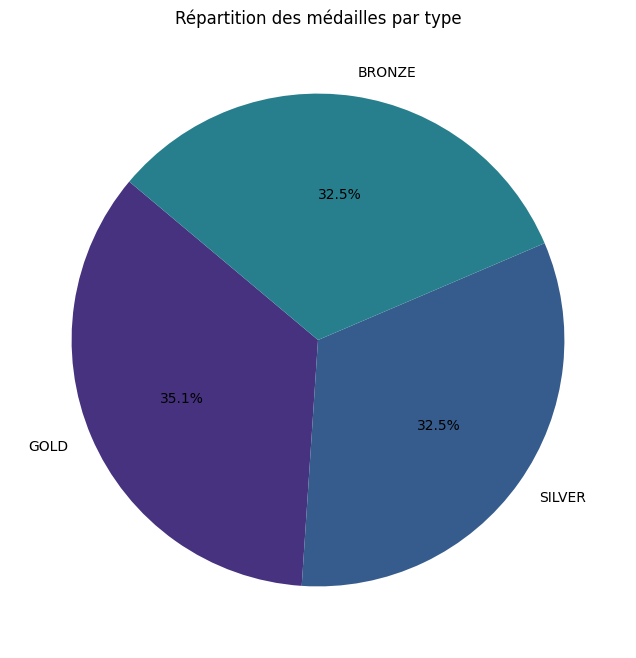

In [8]:
medals_count = combined_df['medal_type_x'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=medals_count.index, y=medals_count.values, palette='viridis')
plt.xlabel('Type de médaille')
plt.ylabel('Nombre de médailles')
plt.title('Répartition des médailles par type')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(medals_count, labels=medals_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Répartition des médailles par type')
plt.show()

C:\Users\kirit\AppData\Local\Temp\ipykernel_26176\2224570338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_country.values, y=medals_by_country.index, palette='viridis')


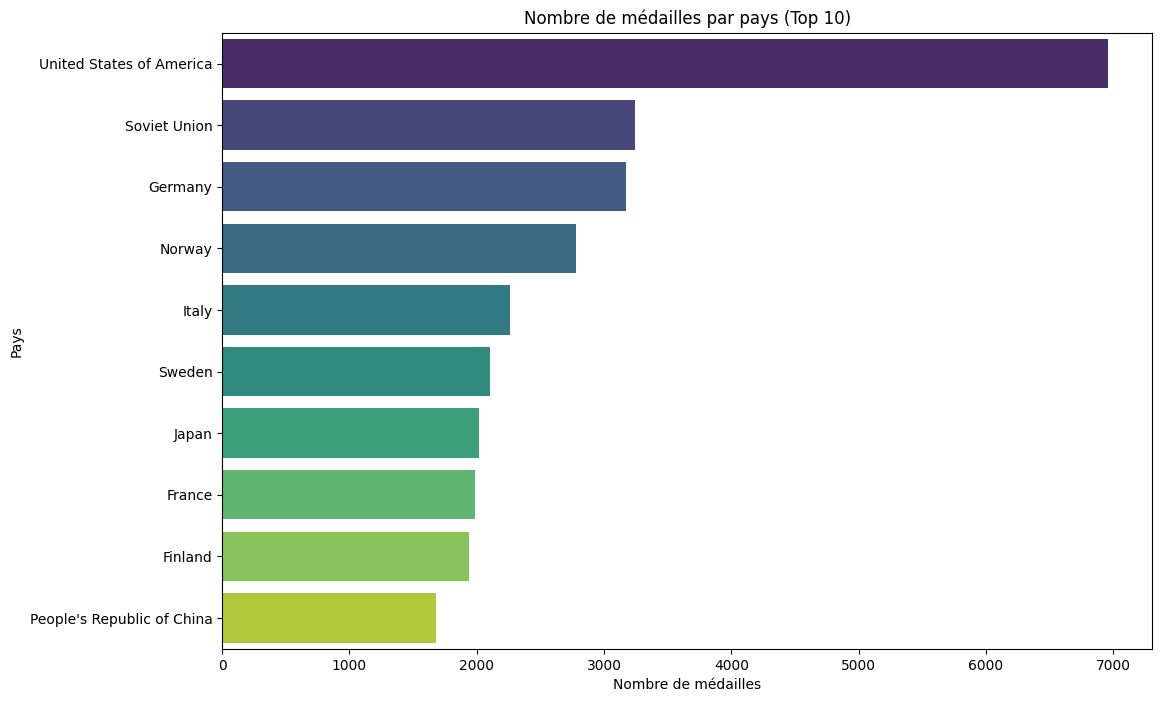

In [9]:
medals_by_country = combined_df['country_name_x'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=medals_by_country.values, y=medals_by_country.index, palette='viridis')
plt.xlabel('Nombre de médailles')
plt.ylabel('Pays')
plt.title('Nombre de médailles par pays (Top 10)')
plt.show()

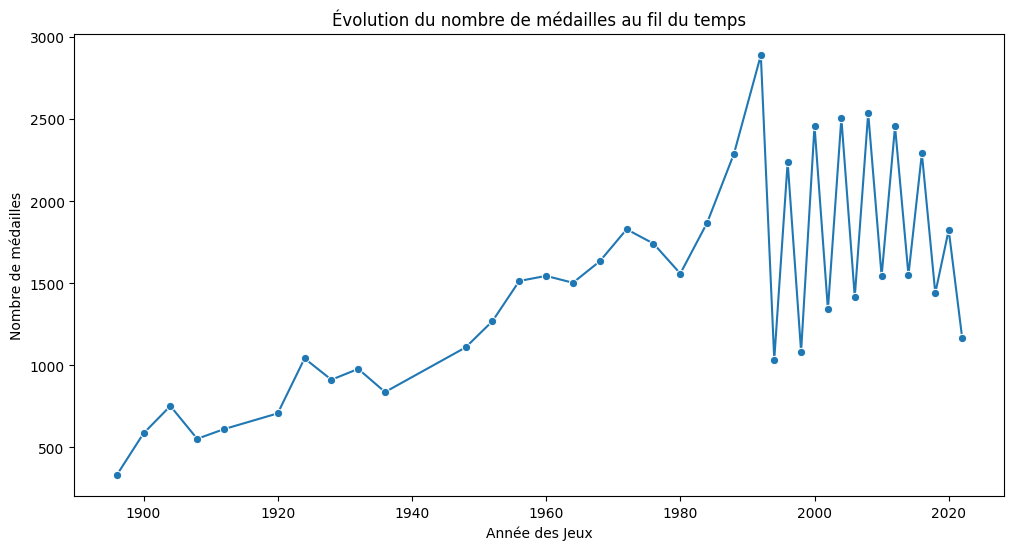

In [10]:
medals_by_year = combined_df.groupby('game_year')['medal_type_x'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=medals_by_year.index, y=medals_by_year.values, marker='o')
plt.xlabel('Année des Jeux')
plt.ylabel('Nombre de médailles')
plt.title('Évolution du nombre de médailles au fil du temps')
plt.show()

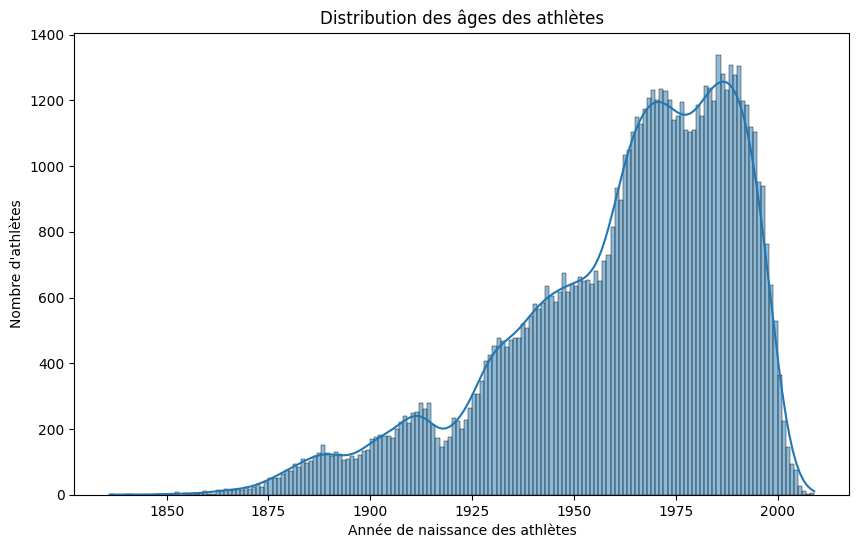

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(athletes_df['athlete_year_birth'], bins=range(int(athletes_df['athlete_year_birth'].min()), int(athletes_df['athlete_year_birth'].max()) + 1), kde=True)
plt.xlabel('Année de naissance des athlètes')
plt.ylabel('Nombre d\'athlètes')
plt.title('Distribution des âges des athlètes')
plt.show()

C:\Users\kirit\AppData\Local\Temp\ipykernel_26176\2849749119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=age_by_discipline.index, x=age_by_discipline.values, palette='viridis')


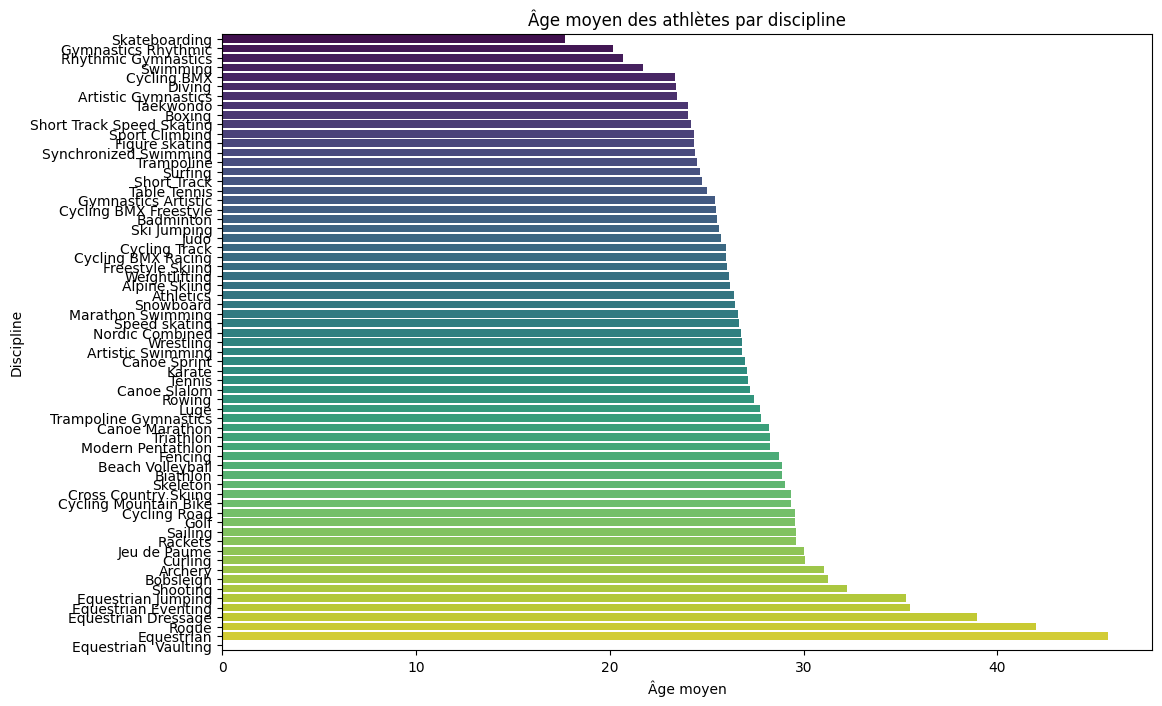

In [17]:
combined_df['age_at_game'] = combined_df['game_year'] - combined_df['athlete_year_birth']

age_by_discipline = combined_df.groupby('discipline_title_x')['age_at_game'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(y=age_by_discipline.index, x=age_by_discipline.values, palette='viridis')
plt.xlabel('Âge moyen')
plt.ylabel('Discipline')
plt.title('Âge moyen des athlètes par discipline')
plt.show()

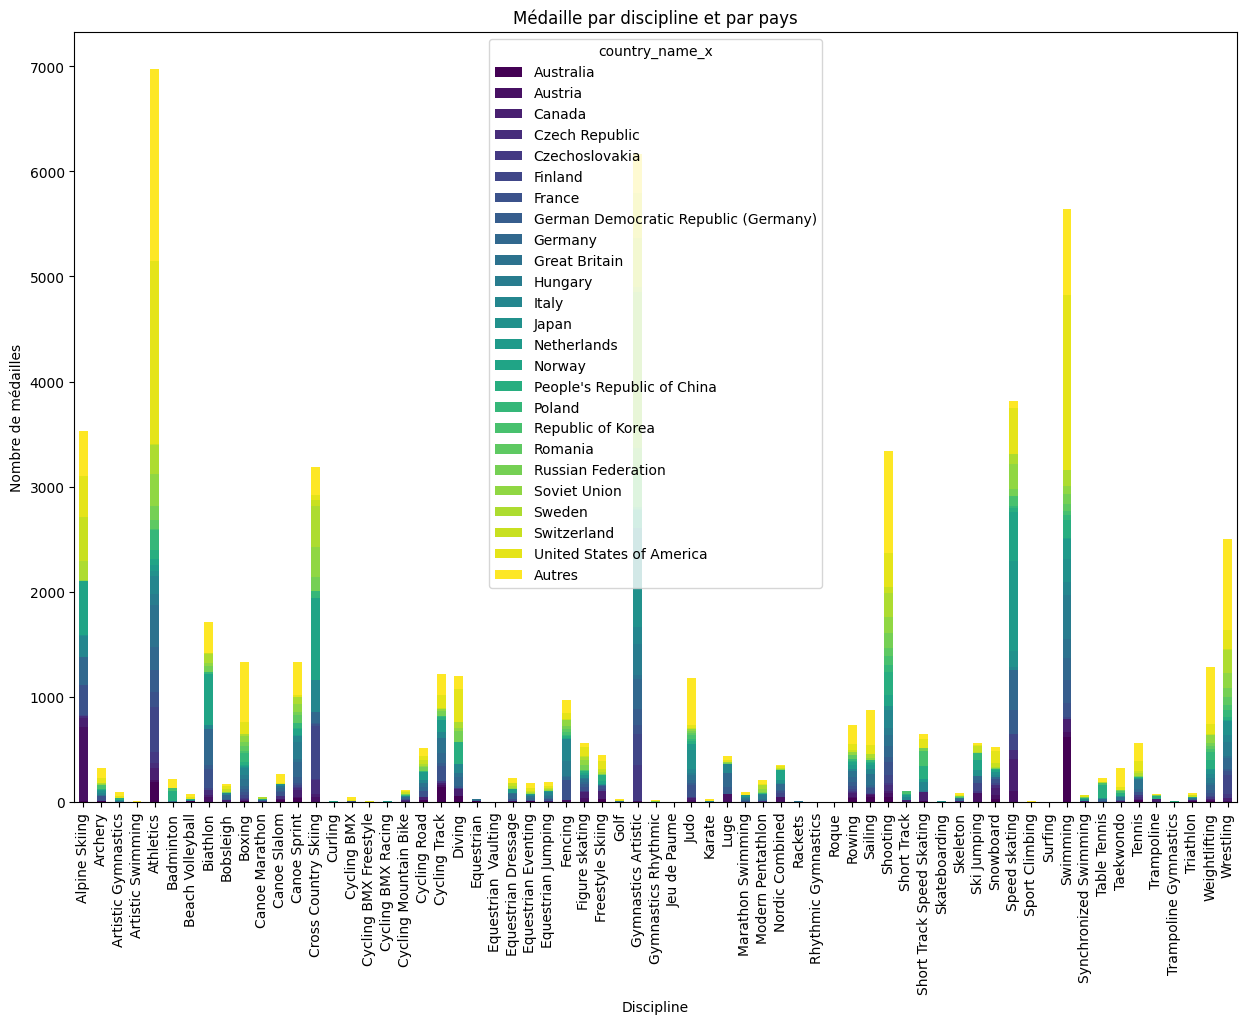

In [13]:
medals_by_discipline_country = combined_df.groupby(['discipline_title_x', 'country_name_x'])['medal_type_x'].count().unstack().fillna(0)
total_medals_by_country = medals_by_discipline_country.sum(axis=0)

threshold = 500
small_countries = total_medals_by_country[total_medals_by_country < threshold].index

medals_by_discipline_country['Autres'] = medals_by_discipline_country[small_countries].sum(axis=1)
medals_by_discipline_country = medals_by_discipline_country.drop(columns=small_countries)

medals_by_discipline_country.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.xlabel('Discipline')
plt.ylabel('Nombre de médailles')
plt.title('Médaille par discipline et par pays')
plt.show()

C:\Users\kirit\AppData\Local\Temp\ipykernel_26176\3947124040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_season.index, y=medals_by_season.values, palette='viridis')


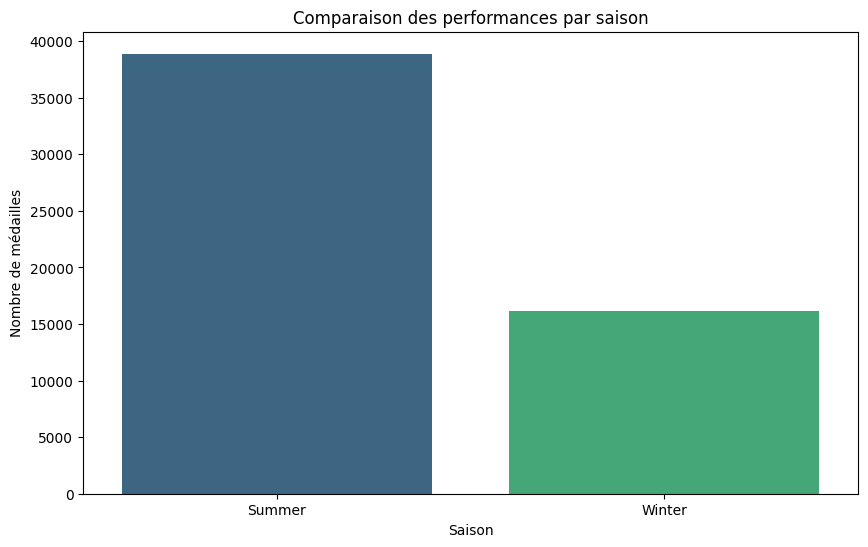

In [14]:
medals_by_season = combined_df.groupby('game_season')['medal_type_x'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=medals_by_season.index, y=medals_by_season.values, palette='viridis')
plt.xlabel('Saison')
plt.ylabel('Nombre de médailles')
plt.title('Comparaison des performances par saison')
plt.show()

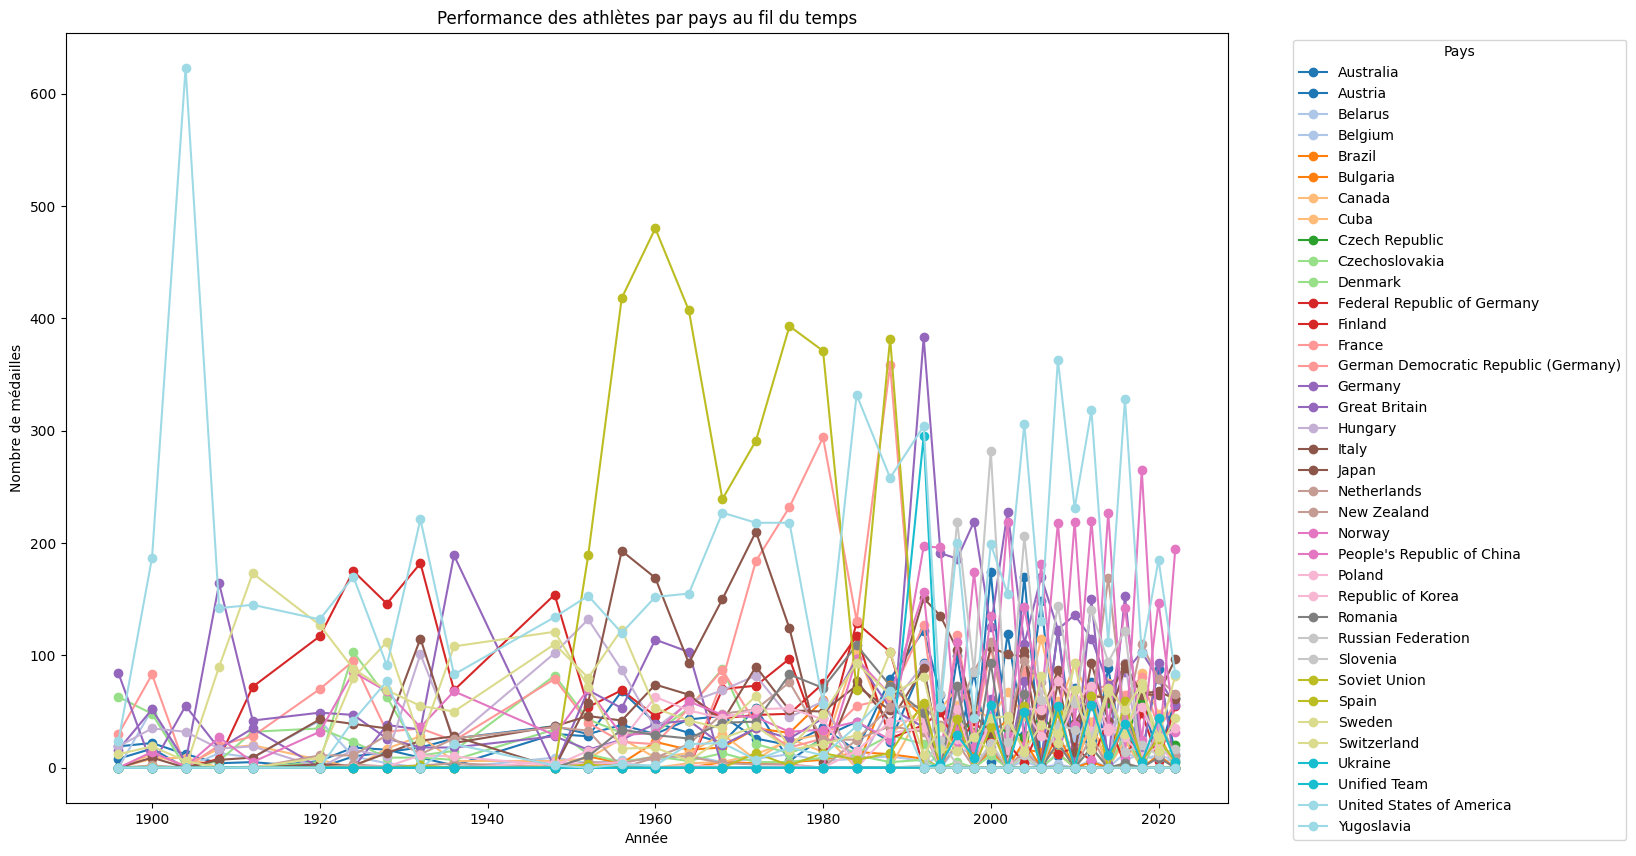

In [15]:
total_medals_by_country = combined_df.groupby('country_name_x')['medal_type_x'].count()

threshold = 250
countries_above_threshold = total_medals_by_country[total_medals_by_country > threshold].index
filtered_df = combined_df[combined_df['country_name_x'].isin(countries_above_threshold)]
medals_by_year_country = filtered_df.groupby(['game_year', 'country_name_x'])['medal_type_x'].count().unstack().fillna(0)

plt.figure(figsize=(15, 10))
medals_by_year_country.plot(kind='line', marker='o', colormap='tab20', ax=plt.gca())
plt.xlabel('Année')
plt.ylabel('Nombre de médailles')
plt.title('Performance des athlètes par pays au fil du temps')
plt.legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

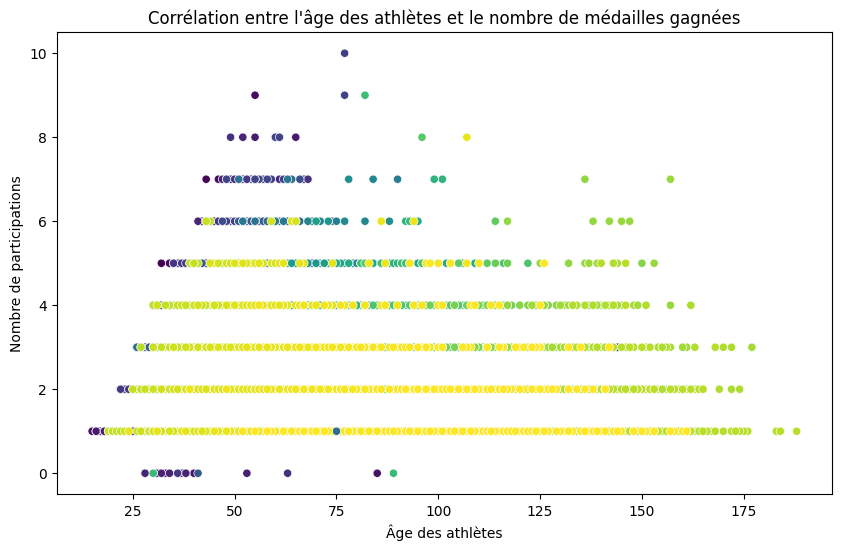

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='games_participations', data=athletes_df, hue='athlete_full_name', palette='viridis', legend=None)
plt.xlabel('Âge des athlètes')
plt.ylabel('Nombre de participations')
plt.title('Corrélation entre l\'âge des athlètes et le nombre de médailles gagnées')
plt.show()